# 1. Abstract

This project explores how the integration of a Large Language Model (LLM) with the Ollama platform to improve student learning in the Data Structures and Algorithms (DSA) domain is made possible. The main goal is to replicate important and interesting dialogues that aid students in getting ready for tests and interviews.

The chatbot is designed to answer questions on DSA by understanding natural language input and providing informative responses. The system incorporates a custom user interface with conversation tracking, enhancing user interaction. It was also tested for its ability to maintain contextual dialogue.

This project highlights the potential of AI-driven educational tools, combining structured prompting with real-time, adaptive learning support to deepen students' understanding of technical concepts.

Future work includes performance evaluation and optimisation.

# 2. Methodology

This project adopts a structured prompting approach to developing a chatbot for answering questions related to DSA.

The interaction flow is guided by the CO-STAR framework, which emphasises providing concise and insightful responses tailored to the user's query. The framework also maintains a formal and educational tone, in line with the goal of assisting users with DSA assessments and interview preparation.

The LLM system prompt was designed to reinforce DSA concepts and encourage deeper understanding. By leveraging the clarity and focus provided by the LLM prompt, the chatbot generates informative and contextually appropriate responses, ensuring that discussions remain on topic, and any deviations are intelligently redirected to maintain focus.

In addition, Retrieval-Augmented Generation (RAG) is integrated with the chatbot to retrieve information from pre-processed documents to generate responses with an increase in accuracy and relevance, ensuring that the chatbot can provide answers that are grounded in external, authoritative sources.

To further enhance user experience and accessibility, a Text-To-Speech (TTS) feature was incorporated into the chatbot. This feature allows the chatbot's text responses to be converted into an audio format, which can be played by the user. By offering both visual and auditory outputs, it enriches the overall user experience and provides a more inclusive environment for users with different learning preferences.

For user interaction, the Gradio interface was implemented to provide a user-friendly, web-based interface for user engagement. This interface was deployed in a Google Colab environment to ensure uniformity and accessibility across different platforms. The integration of llama3 with the Gradio interface enables real-time conversation tracking, maintaining a seamless dialogue flow between the user and the chatbot.

## 2.1. Ollama Set Up
Ollama is a critical component of the project as it serves as the Large Language Model (LLM) platform used for handling real-time queries from students. The setup process begins by installing Ollama and initializing the environment within a Google Colab notebook. This ensures that the model can run consistently and efficiently across different platforms, making it accessible to all students.

**Steps involved:**

1. Install Ollama using the provided script.
2. Pull the required LLM model (llama3 in this case).
3. Start the server to serve the model and make it ready for queries.

We need Ollama to support the LLM interaction as it enables robust, scalable, and real-time processing of queries, ensuring that the chatbot delivers accurate responses.

In [2]:
# Fetch and run installation script for Ollama
# !curl -fsSL https://ollama.com/install.sh | sh

!pip install langchain_community
!pip install gradio

# For RAG
!pip install sentence-transformers
!pip install ChromaDB

# For Text-To-Speech
!pip install gTTS
!pip install IPython

# Import package to run shell commands within Python
import subprocess
# Start Ollama service
process = subprocess.Popen(["ollama", "serve"])

# Download llama3 model
!ollama pull llama3

# Get a proxy URL for accessing the Ollama service
# from google.colab.output import eval_js
# notebook_url = eval_js("google.colab.kernel.proxyPort(11434)")

# !export OLLAMA_HOST=notebook_url

from langchain_community.llms import Ollama
# Define llama3 model
llm = Ollama(model="llama3")

pulling manifest ⠙ 

Error: listen tcp 127.0.0.1:11434: bind: address already in use


pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠧ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠋ pulling manifest ⠋ pulling manifest ⠹ pulling manifest 
pulling 6a0746a1ec1a... 100% ▕████████████████▏ 4.7 GB                         
pulling 4fa551d4f938... 100% ▕████████████████▏  12 KB                         
pulling 8ab4849b038c... 100% ▕████████████████▏  254 B                         
pulling 577073ffcc6c... 100% ▕████████████████▏  110 B                         
pulling 3f8eb4da87fa... 100% ▕████████████████▏  485 B                         
verifying sha256 digest 
writing manifest 
success 


/tmp/ipykernel_79324/274524358.py:31: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="llama3")


## 2.2. Prompt Engineering
Prompt engineering is essential for ensuring the LLM provides structured and meaningful responses. The two prompt styles, CO-STAR and LLM system prompts, work together to guide the chatbot's responses and ensure the conversation stays relevant to the topic.

### 2.2.1. CO-STAR Framework
The CO-STAR framework provides the overall structure of the conversation. It sets the context, objective, style, tone, and audience for the chatbot, ensuring the conversation remains focused on Data Structures and Algorithms (DSA).

* **Context**: DSA-related questions.
* **Objective**: Help students prepare for assessments.
* **Style & Tone**: Professional, clear, and supportive.
* **Audience**: University students.

This prompt helps maintain the focus of the conversation, ensuring that responses are meaningful and aligned with the student’s goals.

In [3]:
costar_framework = """
You are a helpful and intelligent assistant focused exclusively on Data Structures & Algorithms (DSA).
You are helping university students who needs assistance in DSA related topics.
Respond in a formal, professional manner, providing concise and insightful responses.
Your responses should help students understand DSA concepts, ensuring that responses are easy to understand for beginners who are new to DSA.
Avoid deviating from DSA-related topics and always guide them toward deeper understanding and practical application.

CONTEXT:
The user is asking about Data Structures & Algorithms and preparing for assessments or interviews.

OBJECTIVE:
Your goal is to provide short, insightful responses that clarify DSA concepts, guide students through problem-solving approaches,
and prepare them for assessments and interviews. Focus on explaining concepts in a way that is clear, meaningful, and engaging.

STYLE:
Professional as if you are a professor guiding a student, but concise enough to not overwhelm them.

TONE:
Formal but supportive and encouraging.

AUDIENCE:
University students preparing for DSA assessments or IWSP interviews.

RESPONSE:
{user_input}
"""

### 2.2.2. LLM System Prompt
The LLM system prompt complements the CO-STAR prompt by ensuring that the responses generated by the LLM are concise and accurate. It acts as a guide to keep the conversation on track, avoiding digressions from DSA-related topics.

* **Clarity**: Ensures that all responses are easy to understand.
* **Focus**: Keeps the conversation strictly about DSA topics, offering relevant solutions.

The LLM system prompt helps reinforce clarity and prevent the conversation from veering off-topic.

In [4]:
llm_system_prompt = """
Your responses should be concise, clear, and insightful.
Focus on explaining DSA concepts, asking relevant follow-up questions, and guiding students through problem-solving approaches.
If a student's response is incorrect or incomplete, provide constructive feedback and ask probing questions to deepen their understanding.

Always ensure the conversation stays on the topic of DSA, and politely redirect the discussion if the student asks about unrelated topics.
Do not veer away from the topic of DSA.
Use a formal yet encouraging tone, similar to that of a professor helping a student one-on-one. When a student provides a correct or thoughtful response, acknowledge their effort and provide positive reinforcement.
"""


## 2.3. Retrieval-Augmented Generation (RAG) Implementation

In this section, RAG, a technique that enhances LLMs by augmenting their responses with information retrieved from external document sources is implemented. This combination allows for a more accurate response to user queries.

**The RAG implementation involves the following steps:**

1. **Document Scraping and Processing:** The RecursiveUrlLoader from the Langchain library is used to scrape content from web sources. For demonstation purposes, the binary search algorithm page from W3Schools was used. In addition, a depth of 1 was specified to limit the retrieval to a manageable number of documents.

2. **Breaking Down Document into Chunks:** Once the content has been scraped, it is then split into manageable chunks using RecursiveCharacterTextSplitter. This step ensures that the data is broken down into segments of 1000 characters, with an overlap of 200 characters between consecutive chunks. This process is essential for optimising both the generation and retrieval process, as the chunks help the LLM to focus on specific information.

3. **Vector Embeddings:** HuggingFaceEmbeddings was utilised with the pre-trained all-MiniLM-L6-v2 model to convert the document chunks into vector embeddings. These embeddings give a semantic meaning to each chunk of text, allowing for efficient comparison and retrieval based on the user's query.

4. **Storing the Embeddings:** The document embeddings were then stored in ChromaDB, which is optimised for high-performance similarity searches. This allows for fast retrieval of any relevant information based on the user query.

5. **Query Processing and Retrieval:** ConversationalRetrievalChain was implemented to integrate the retrieval of vector embeddings with the LLM response. When a user asks a question, the retrieval chain searches for any relevant document in the ChromaDB store. It then combines the retrieved context with the LLM's response, enhancing the accuracy and relevance of the output.

In [5]:
from langchain.document_loaders.recursive_url_loader import RecursiveUrlLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains import ConversationalRetrievalChain
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma
from bs4 import BeautifulSoup as Soup

# List of URLs to scrape from
urls = [
        "https://www.w3schools.com/dsa/dsa_algo_binarysearch.php"
        ]

# Combine documents from multiple URLs
documents = []
for url in urls:
  loader = RecursiveUrlLoader(
      url,
      max_depth=1, # Just for demonstration purposes, otherwise it'll take too long
      extractor=lambda x: Soup(x, "html.parser").text
  )
  documents.extend(loader.load())

# Split text in documents into manageable chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
)
documents = text_splitter.split_documents(documents)

# Create vector embeddings from documents using a pre-trained model
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

# Store vector embeddings in ChromaDB
vectordb = Chroma.from_documents(
    documents=documents,
    embedding=embeddings,
    persist_directory="./data/chromadb"
)

# Process user queries and retrieve relevant document sections
conversation = ConversationalRetrievalChain.from_llm(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True
)

/tmp/ipykernel_79324/3244885881.py:31: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
/home/donny/Documents/STLA/teammates/teammates_env/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/home/donny/Documents/STLA/teammates/teammates_env/lib/python3.10/site-packages/torch/cuda/__init__.py:128: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorr

## 2.4.  Combining the CO-STAR, LLM System Prompts, and Relevant Document Sections from RAG
After defining both prompts and RAG, they are combined to create a cohesive prompt structure that the LLM can follow. This combination ensures that the LLM not only stays on topic but also provides meaningful, guided responses that help students enhance their understanding of DSA. The inclusion of RAG also ensures that the LLM model is able to facilitate providing up-to-date and specific information if needed.


In [6]:
# Combine the CO-STAR framework, LLM system prompt, and the relevant document sections from RAG
def create_formatted_prompt(user_input, rag_context):
    combined_prompt = f"""
    COSTAR FRAMEWORK:
    {costar_framework}
    #####
    LLM SYSTEM PROMPT:
    {llm_system_prompt}
    #####
    RELEVANT DOCUMENT SECTIONS FROM RAG:
    {rag_context}
    #####
    USER QUESTION:
    {user_input}
    """
    return combined_prompt

## 2.5. Text-To-Speech

Text-To-Speech (TTS) is implemented using the gTTS (Google Text-To-Speech) library.

The TTS function play_response_as_audio converts a given text input into an audio file. This file is then saved in an MP3 format to be played back.

TTS allows the conversion of textual information into spoken words, providing an auditory output that enhances and benefits those who prefer auditory learning or those who require accessibility support due to visual impairments, making the chatbot more versatile by introducing an alternative way for users to receive information.

In [7]:
from gtts import gTTS

# Function to convert text to speech and play it
def play_response_as_audio(response_text):
  print("Converting to speech...")
  tts = gTTS(text=response_text, lang="en", slow=False)
  audio_path = "output_response.mp3"
  tts.save(audio_path)

  return audio_path

## 2.6. Gradio Interface Setup and Interaction

Gradio is a simple and intuitive interface that enables real-time interaction with the chatbot. The setup involves creating a textbox for student input and displaying the conversation history. The ability to retain and display chat history is crucial for maintaining context and allowing students to follow the flow of the conversation.

**Steps involved:**

1. Install and set up Gradio in the Colab environment.
2. Define the layout of the Gradio interface, including a textbox for student input and a section for displaying the conversation history.
3. Launch the Gradio interface, enabling real-time interaction.

Gradio is an essential component of the user experience, allowing students to input their DSA-related questions and see the chatbot’s responses in a clear and structured format.


---


## 2.7. Interaction Flow

One of the key features of the Gradio interface is its ability to retain and display the entire conversation history. This is important for both the student and the chatbot, as it helps maintain context during the interaction and allows the student to review the flow of questions and answers.

### 2.7.1. Retaining and Displaying Chat History

The chat history is stored in a list (`conversation_history`) and updated with each new input and response. This list is then rendered in the Gradio interface to provide a continuous dialogue. The steps involved in retaining chat history include:

1. **Initializing the Chat History:** At the start of the interaction, the conversation history is initialized as an empty list.

2. **Updating the Chat History:**

  * When a student submits a question, the input is appended to the chat history along with an indicator that it came from the user.
  * After processing the input and generating a response using the LLM, the chatbot's response is appended to the chat history, clearly labeled as coming from the chatbot.

3. **Displaying the Chat History:** The entire conversation history is displayed in the Gradio interface. Each input and response is formatted and shown in the chat window, allowing the student to scroll through the previous dialogue.

### 2.7.2. Combining Prompt Handling and Gradio Interaction

Gradio is integrated with the LLM and combined prompt framework to ensure that input from the user is processed correctly. Once the student inputs a question, it is formatted using the combined CO-STAR and LLM system prompts, and the LLM generates a response based on this structure. Both the student’s input and the chatbot’s response are stored in the conversation history, which is continuously displayed as the interaction progresses.

**Steps involved:**

1. Gradio captures the student’s input and adds it to the conversation history.
2. Input is processed using the combined CO-STAR and LLM system prompts to generate a response.
3. Chatbot's response is added to the conversation history, maintaining a continuous log of the interaction.
4. Gradio interface shows both the current input and response, along with the full conversation history.

The Gradio interface presents a dynamic interaction, with a textbox for student input and an output section displaying the chatbot’s responses. Additionally, the chat history serves as a valuable reference for students as they engage with the chatbot, helping them to track the questions they have asked and the responses they have received. This continuity ensures that the conversation flows naturally, and the student can always refer back to previous exchanges.


---


#### **Example of interaction flow**
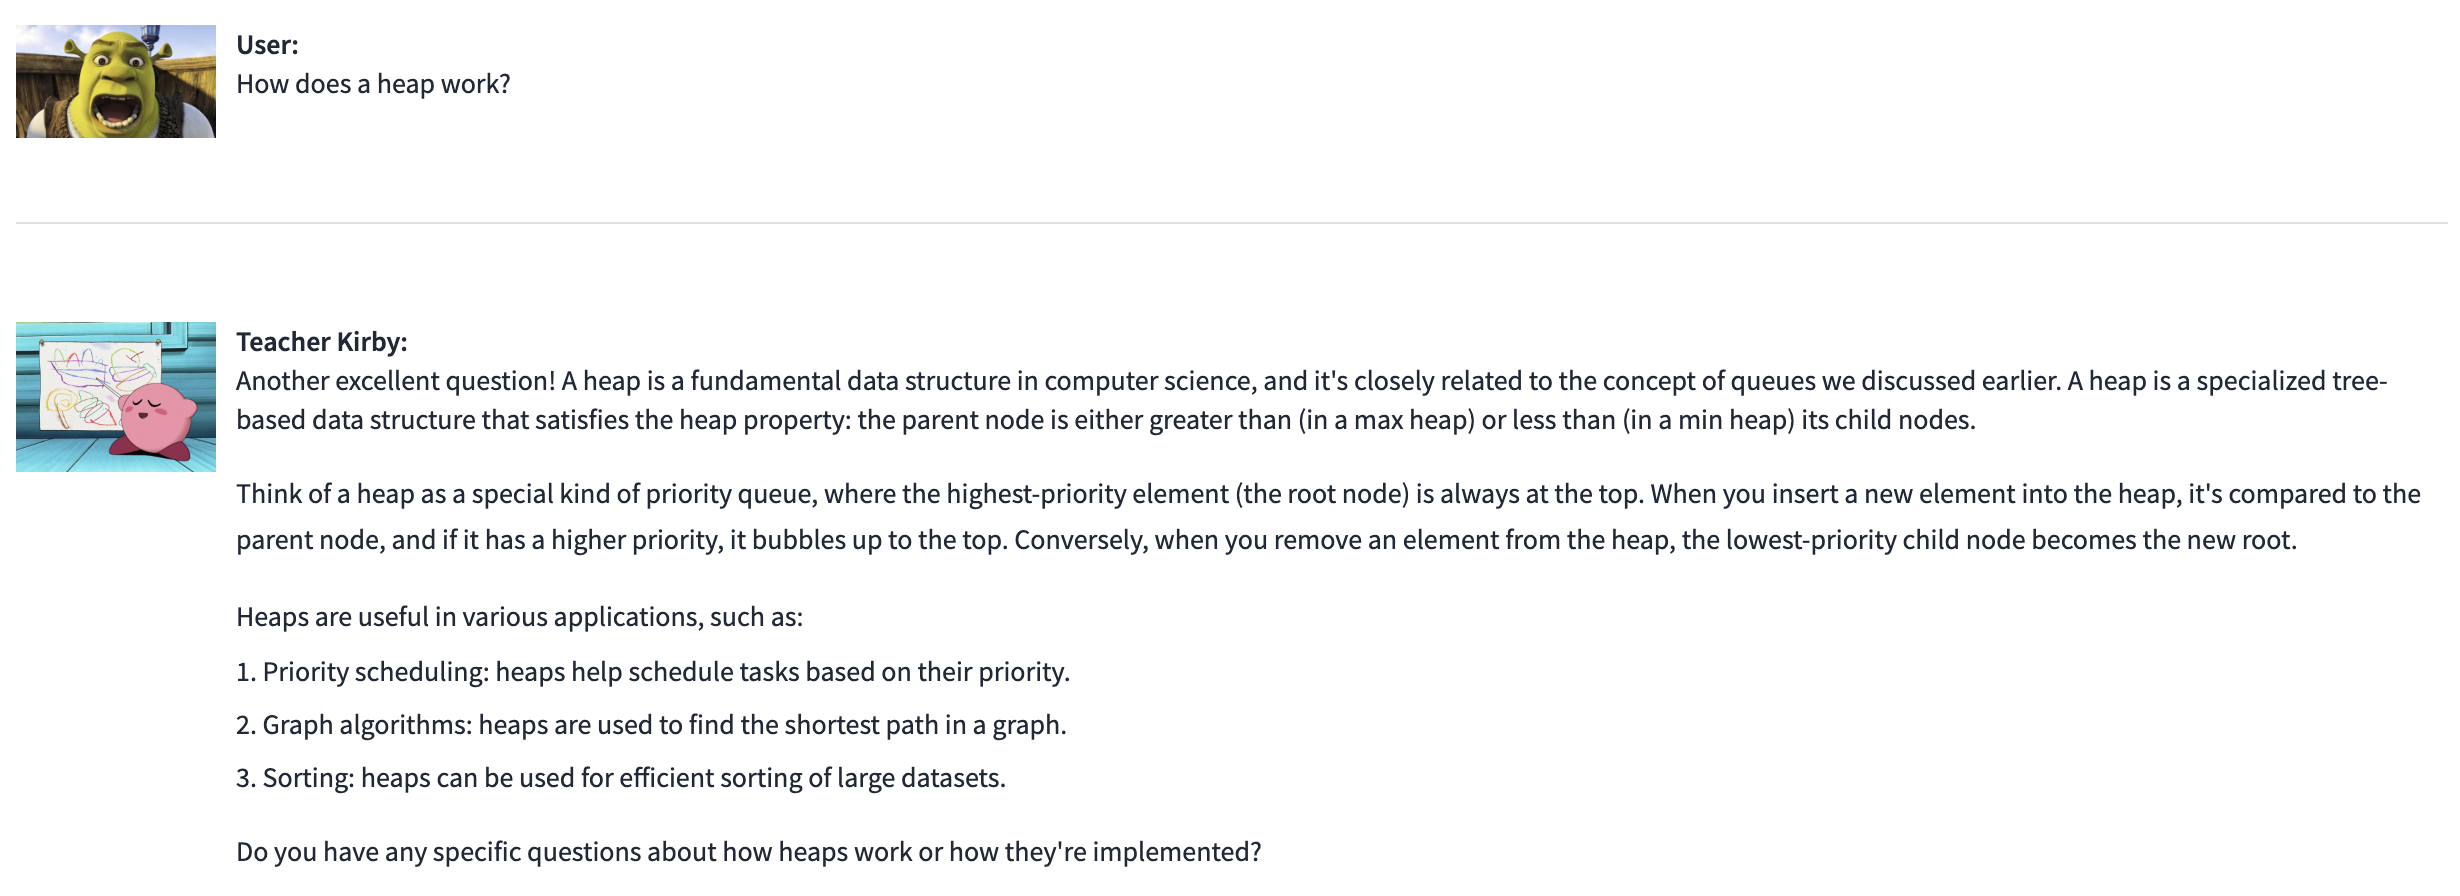

In [8]:
import gradio as gr

# Initialise conversation history in an empty list
conversation_history = []
prompt_history = []

# Image URLs
user_image_url = "https://cdn.theatlantic.com/thumbor/4dTl39ouRGC009WveLQOUvmZ9l4=/68x29:1211x672/960x540/media/img/upload/wire/2014/05/19/shrek1/original.jpg"
chatbot_image_url = "https://pbs.twimg.com/media/GQw-nydXkAA3SZY.jpg"

def process_input(user_input=None):
  global conversation_history, prompt_history

  if not user_input:
    return "Please enter text", None

  # Retrieve relevant document sections from RAG
  rag_response = conversation({"question": user_input, "chat_history": prompt_history})
  rag_context = rag_response['answer']
  rag_documents = rag_response.get('source_documents', [])

  # For testing purposes to see if RAG is working
  # print(f"RAG Context: {rag_context}") # Print output of RAG
  # for doc in rag_documents: # Display sources of documents
  #   print(f"Document source: {doc.metadata['source']}")

  # Format user question
  conversation_history.append(f'''
  <div style="display: flex; align-items: flex-start;">
      <img src="{user_image_url}" alt="User" width="100" style="margin-right: 10px;"/>
      <div>
        <strong>User:</strong>
        <br>
        {user_input}
      </div>
  </div>
  \n\n---\n\n
  ''')

  # Create formatted prompt
  formatted_prompt = create_formatted_prompt(user_input, rag_context)

  # Save conversation history in the prompt
  formatted_prompt = "\n".join([f"User: {x[0]}\nTeacher Kirby: {x[1]}" for x in prompt_history]) + "\n" + formatted_prompt

  # Get LLM response
  response = llm.invoke(formatted_prompt)

  # Format chatbot response
  chatbot_response = f"""
  <div style="display: flex; align-items: flex-start;">
      <img src="{chatbot_image_url}" alt="Teacher Kirby" width="100" style="margin-right: 10px;"/>
      <div>
        <strong>Teacher Kirby:</strong>
        <br>
        {response}
      </div>
  </div>
  \n\n---\n\n
  """

  # Append to conversation history
  conversation_history.append(chatbot_response)

  prompt_history.append((user_input, response))

  # Play chatbot's response as audio
  audio_path = play_response_as_audio(response)

  # Return full conversation history
  return "\n\n".join(conversation_history), audio_path

# Custom layout
with gr.Blocks() as interface:
  # Output / conversation history at the top
  conversation_display = gr.Markdown(label="Conversation", elem_id="conversation")
  audio_output = gr.Audio(label="Teacher Kirby's Audio Response")

  # Input at the bottom
  with gr.Row():
    user_input = gr.Textbox(lines=2, placeholder="Enter your DSA question here...", label="Ask Teacher Kirby about DSA", scale=8)

  submit_button = gr.Button("Submit", scale=1)

  # Define click actions
  submit_button.click(fn=process_input, inputs=user_input, outputs=[conversation_display, audio_output])

interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


2024/10/16 13:44:36 [W] [service.go:132] login to server failed: dial tcp: lookup gradio-live.com: i/o timeout


/tmp/ipykernel_79324/1599177458.py:18: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  rag_response = conversation({"question": user_input, "chat_history": prompt_history})


Converting to speech...


# 3. Results

The chatbot successfully answered a range of DSA-related questions, providing clear and concise explanations. The llama3 model demonstrates strong capabilities in maintaining the flow of conversation and contextual understanding. While performance metrics such as speed and response accuracy were not quantitatively measured, the chatbot was observed to handle various user inputs effectively during internal testing.

## 3.1. Chatbot Answering DSA-Related Questions

In this section, the chatbot demonstrates its ability to explain core DSA concepts. For instance, the user begins by asking for an explanation of binary trees, and the chatbot provides a clear and concise explanation. The chatbot introduces binary trees, outlining their structure, and elaborating on important concepts such as nodes, edges, and various traversal methods.

The chatbot's responses showcase its strength in offering educational support by breaking down complex ideas and concepts into digestible information. The dialogue continues as the user asks follow-up questions about the real-world applications of binary trees, and the chatbot smoothly maintains the context while answering. This interaction highlights the chatbot's capability to handle follow-up inquiries and provide progressively more in-depth knowledge.

---

#### **User asking about binary trees**

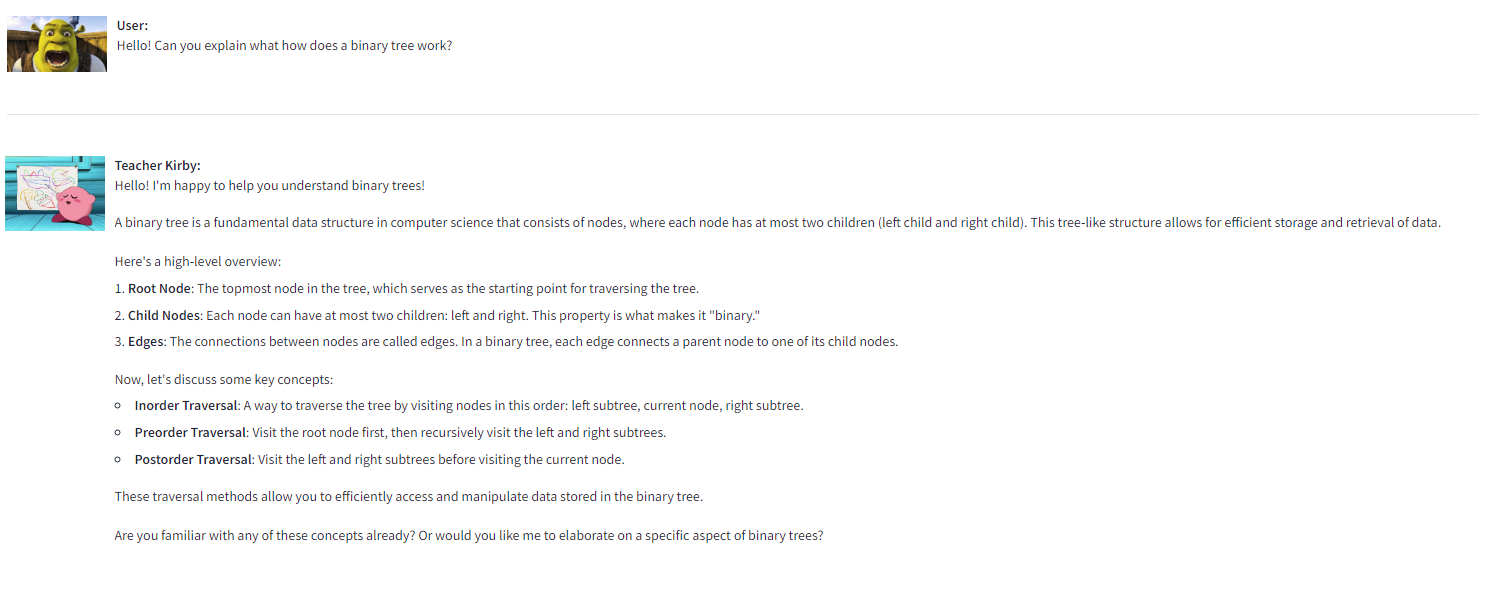

---

## 3.2. Chatbot Maintaining Flow and Context of Conversations

The chatbot's conversational flow is maintained even when the user transitions to a related, but more specific, topic. After discussing the fundamental concepts of binary trees, the user asks about the real-world applications of binary trees (without mentioning binary trees in their prompt). The chatbot successfully transitions the conversation while preserving context.

This interaction demonstrates the model's capability to handle follow-up questions and guide the user through learning by expanding on previously discussed topics. The chatbot effectively follows the user's inquiries and provides responses that build on the previous explanation.

Additionally, when the user provides only a numeric response ("number 5 sounds interesting!"), the chatbot remains consistent in maintaining the topic's context, interpreting the user's choice, and explaining the corresponding real-world application. This further emphasises the chatbot's strength in keeping the conversation coherent, even when the user inputs are minimal or vague.

---

#### **User continuing their conversation on binary trees by asking about real-world applications**

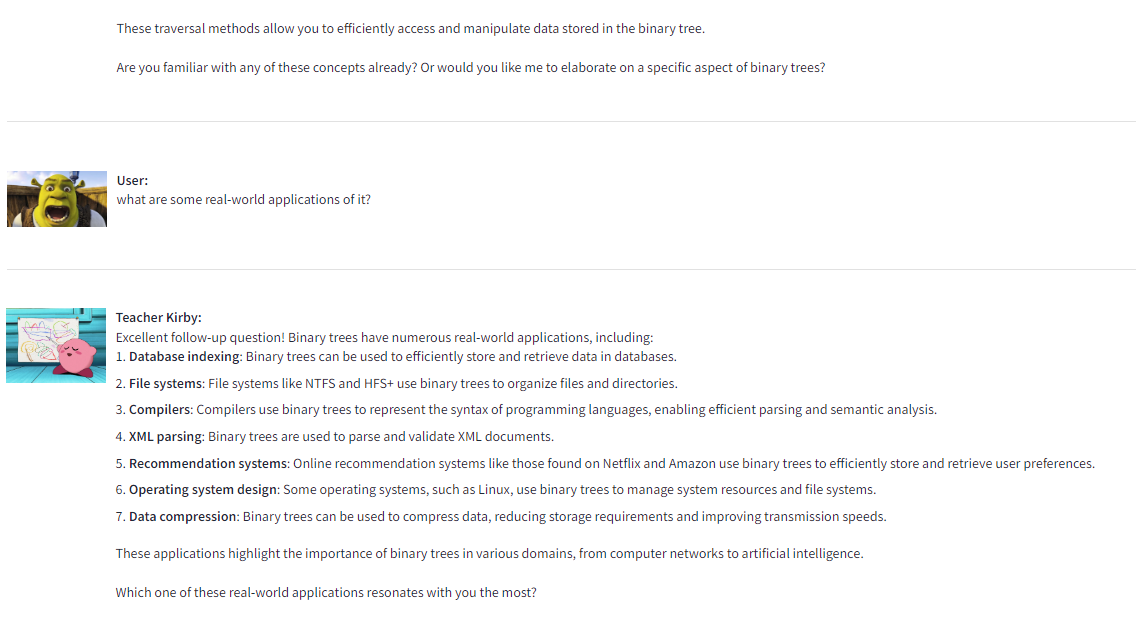

---

#### **User continuing their conversation by specifying a number without any prior context**

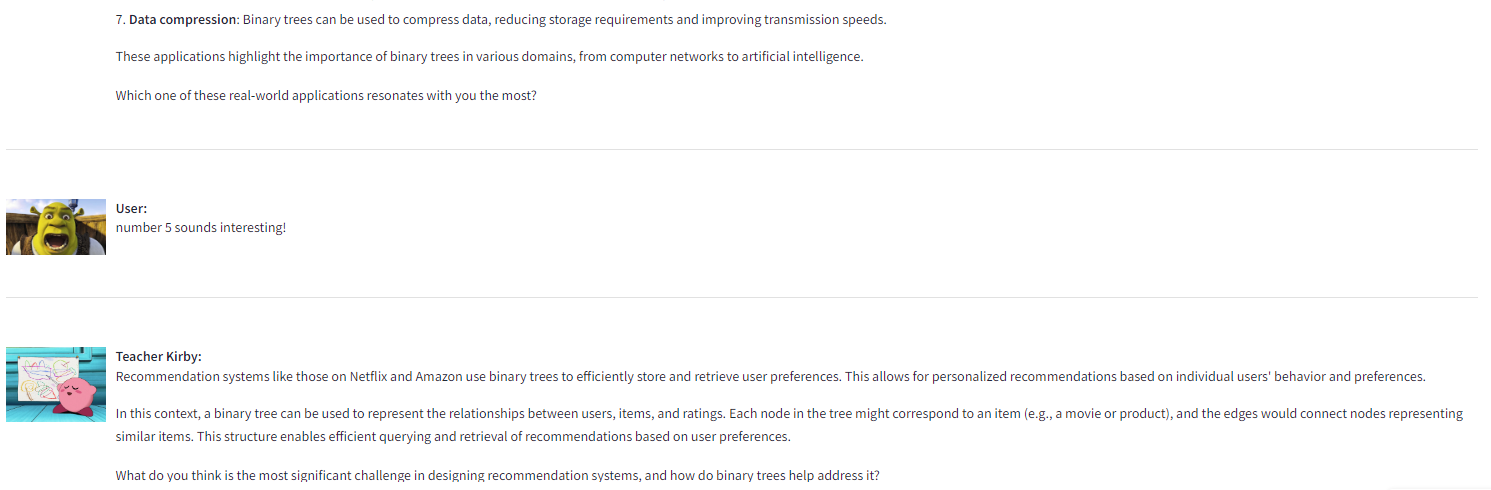

---

## 3.3. Chatbot Diverting from Non-DSA-Related Questions

In this section, the chatbot shows how it handles off-topic questions, which is critical for maintaining a focused and educational discussion. When the user asks for Netflix recommendations, which falls outside of the scope of DSA, the chatbot tactfully redirects the conversation by stating that its purpose is to guide the user on DSA topics rather than media recommendations.

This behaviour illustrates the importance of LLM system prompting, to enable the llama3 model to adhere to structured prompting, where it remains strictly aligned with its primary objective of discussing DSA concepts. By redirecting irrelevant questions, the chatbot ensures that the interaction stays productive and on topic, enhancing the educational experience for the user.

---

#### **Chatbot diverting from an irrelevant question asked by the user**

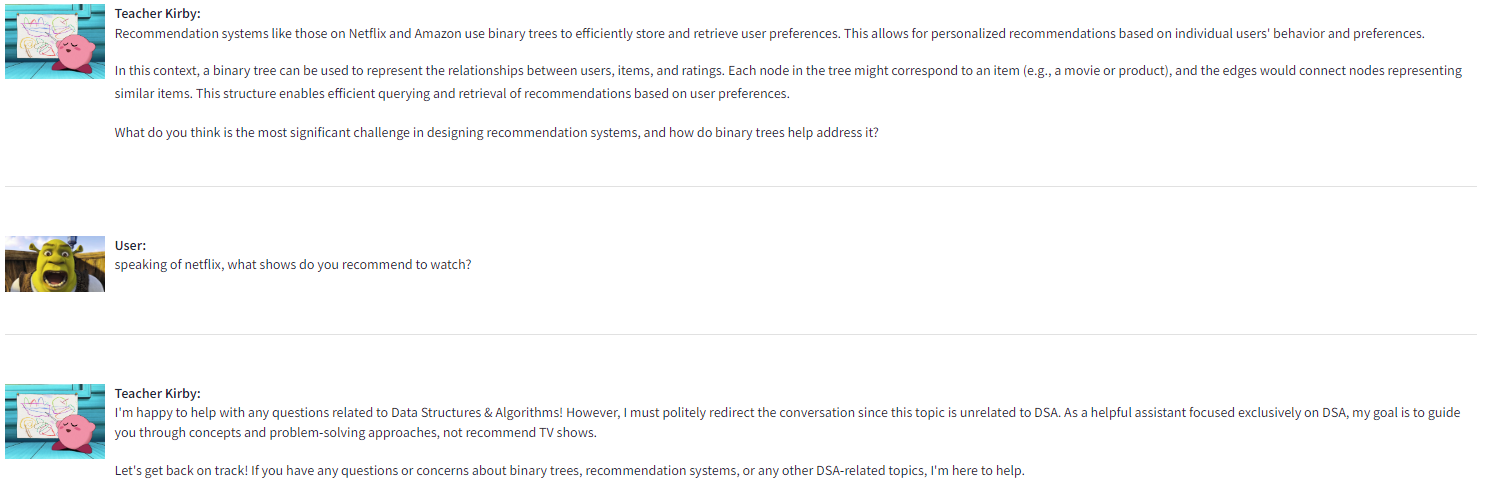

---

## 3.4. Chatbot Leveraging Data From RAG

The integration of RAG into the chatbot significantly enhances its ability to provide accurate, contextually relevant answers to user queries. When the user asks a question, the system first searches for any relevant document sections in the database before generating a response.

By leveraging data from RAG, the chatbot is able to ground its answers in authoritative sources (subjective as sources are chosen by the developer), improving the quality and reliability of its responses. This is especially useful for questions where the answer might be highly specific or requires up-to-date information that may not be encoded in the LLM at that point in time.

In situations where no relevant data is available in the database, the chatbot is informed and continues the conversation using the pre-existing knowlesge base embedded within the LLM, ensuring that the interaction with the user remains productive.

---

#### **Chatbot using relevant document section from RAG to answer questions**

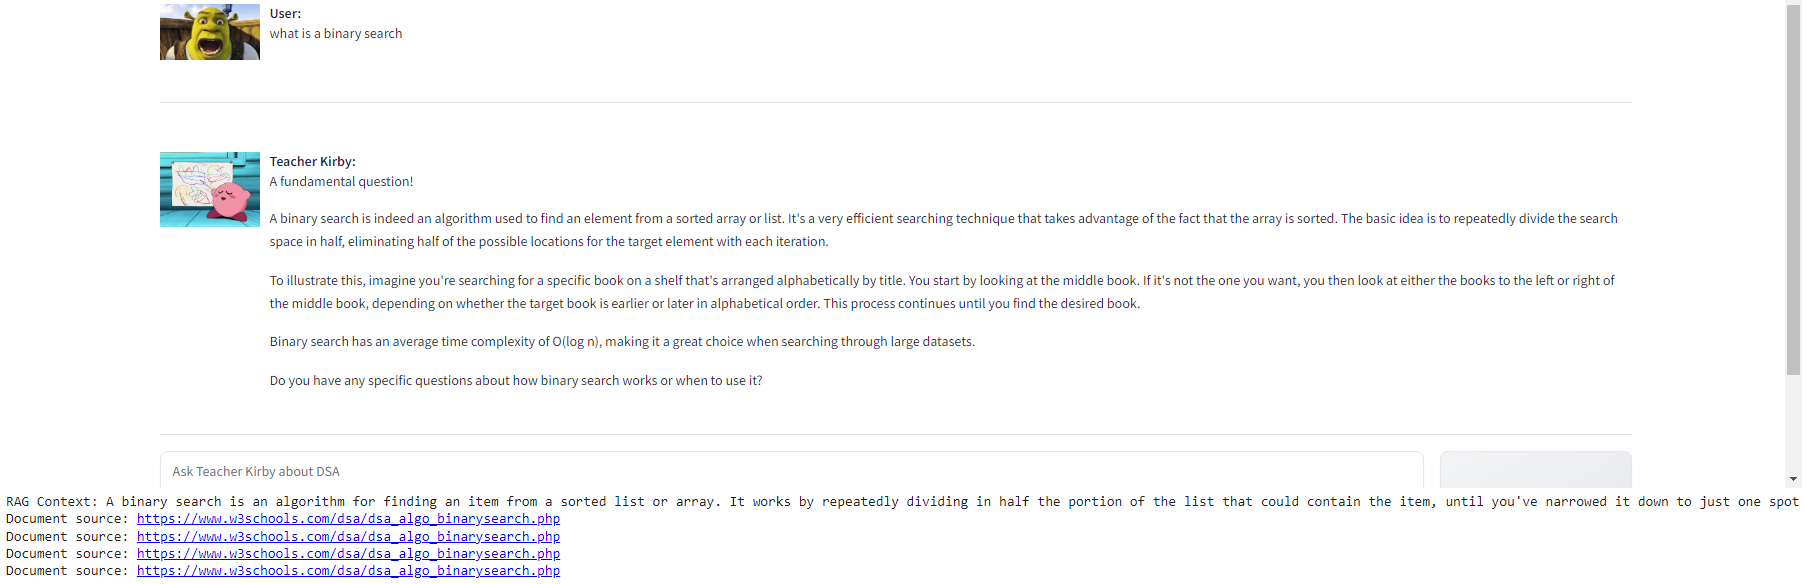

---

#### **Chatbot unable to leverage on RAG due to no relevant data**

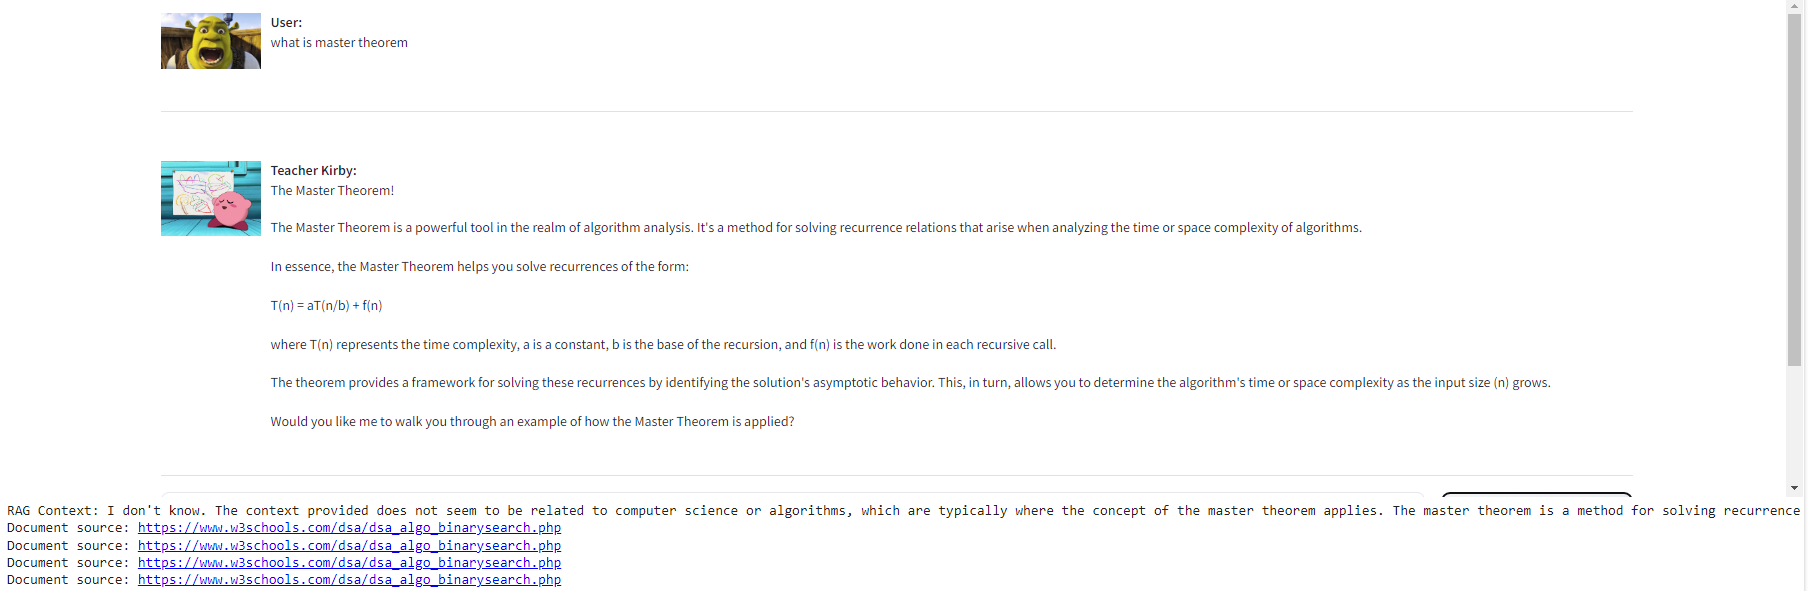

---

## 3.5. Chatbot Providing Both Visual and Audio (Text-To-Speech) Options For Users

In this section, it is to be highlighted that the chatbot goes beyond simple text-based responses by incorporating TTS functionality. The chatbot is designed to respond to user queries about DSA in both text and audio formats. This added feature improves accessibility by allowing users to listen to the chatbot's answers, which can be useful for those with difficulty learning through visual formats.

In the example below, the chatbot explains the QuickSort algorithm and provides an audio playback of the explanation. This allows users to either read through the steps or listen to them, providing a dual-mode of learning that can reinforce understanding.

---

#### **Chatbot text responses converted to an audio file for users to play**

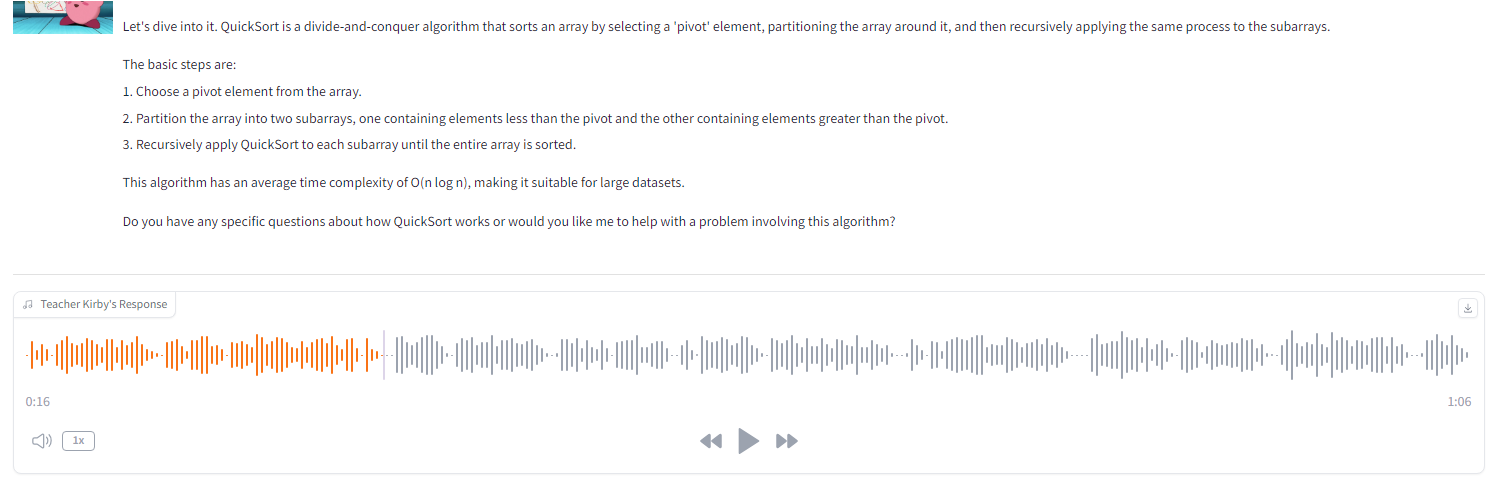

# 4. Conclusion

This project successfully demonstrated the potential of integrating an LLM with structured prompting techniques to create a chatbot that effectively assists students in understanding DSA. By utilising the CO-STAR framework, LLM system prompt, RAG, as well as the Gradio interface, the chatbot provided clear, educational, and contextually appropriate responses, adhering to the educational goals of preparing students for DSA assessments and interviews.

The chatbot was particularly effective in maintaining the flow of conversation, handling follow-up questions, and redirecting off-topic discussions to keep the user focused on the relevant subject matter. The ability to guide conversations on complex DSA concepts in a structured and adaptive manner highlights the model's capacity to support learning in real-time.

Although performance metrics such as accuracy and response time were not quantitatively measured in this part of the project, qualitative observations indicate the chatbot's capability to provide insightful and informative responses. Future improvements could focus on optimising the model's performance, improving its ability to handle even more complex and diverse queries at a faster rate.

In conclusion, the integration of LLMs like llama3 to build interactive and educational tools demonstrates a promising approach to enhance students' learning experiences by providing personalised, adaptive, and interactive support for complex topics like DSA.